In [1]:
from tensorflow.keras.datasets import imdb

NUM_WORDS=5000

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=NUM_WORDS)

In [2]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(25000,)
(25000,)
(25000,)
(25000,)


1


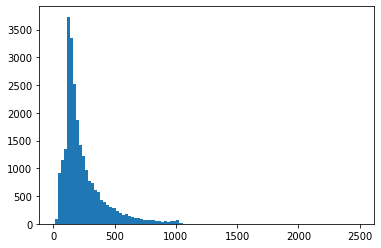

In [3]:
print(train_labels[0])

%matplotlib inline 
import matplotlib.pyplot as plt

lengths = [len(x) for x in train_data]

plt.hist(lengths, bins=100)
plt.show()
plt.close()


In [4]:
import numpy as np
print("min", np.min(lengths))
print("max", np.max(lengths))
print("mean", np.mean(lengths))
print("median", np.median(lengths))
print("std", np.std(lengths))

min 11
max 2494
mean 238.71364
median 178.0
std 176.49367364852034


In [5]:
word_index = imdb.get_word_index()


reverse_index = { value:key for key, value in word_index.items() }

index = 0
review = " ".join([reverse_index.get(x - 3, "") for x in train_data[index]])
print(train_labels[index], review)




1  this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly  was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little  that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big  for the whole film but these children are amazing and should be  for what they have done don't you think the whole story was so lovel

In [6]:
def vectorize_sequences(sequences, dimension=NUM_WORDS): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0 ## assigns 1 to multiple entries at once
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


print(x_train.shape)
print(x_train[0])

(25000, 5000)
[0. 1. 1. ... 0. 0. 0.]


In [7]:
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")

In [8]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(NUM_WORDS,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


W0722 16:46:03.441854 4637988288 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0722 16:46:03.515484 4637988288 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80016     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 81,169
Trainable params: 81,169
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=512,
    validation_split=0.2
)


Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 1s 38us/sample - loss: 0.4947 - acc: 0.7898 - val_loss: 0.3520 - val_acc: 0.8732
Epoch 2/30
20000/20000 [==============================] - 1s 28us/sample - loss: 0.2896 - acc: 0.8930 - val_loss: 0.3582 - val_acc: 0.8510
Epoch 3/30
20000/20000 [==============================] - 1s 28us/sample - loss: 0.2368 - acc: 0.9103 - val_loss: 0.2865 - val_acc: 0.8848
Epoch 4/30
20000/20000 [==============================] - 1s 28us/sample - loss: 0.2109 - acc: 0.9226 - val_loss: 0.2961 - val_acc: 0.8868
Epoch 5/30
20000/20000 [==============================] - 1s 28us/sample - loss: 0.1877 - acc: 0.9294 - val_loss: 0.3161 - val_acc: 0.8806
Epoch 6/30
20000/20000 [==============================] - 1s 28us/sample - loss: 0.1765 - acc: 0.9326 - val_loss: 0.3242 - val_acc: 0.8806
Epoch 7/30
20000/20000 [==============================] - 1s 28us/sample - loss: 0.1620 - acc: 0.9372 - val_loss: 0.3

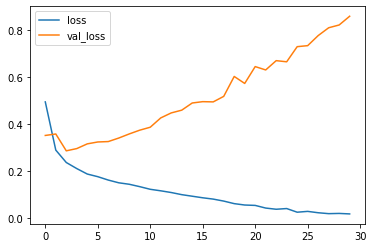

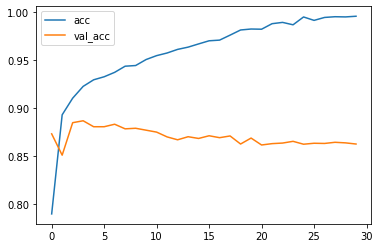

In [10]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["acc"], label="acc")
plt.plot(history.history["val_acc"], label="val_acc")
plt.legend()
plt.show()
plt.close()

In [11]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 27us/sample - loss: 0.9165 - acc: 0.8476


[0.9165446485638619, 0.8476]

In [12]:

#review = "this is the worst movie i ever saw the actors are terrible and the production is poor"
#review = "this is amazing the screenplay is great and the actors are perfect"
# review = "worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the  and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life"
#["chico", "tw", "cool", "blabla"]
# "chico cool" => [1, 0, 1, 0]

# [0, 2] => [1, 0, 1, 0]

# [0, 1, 0, 1, 1]
import re

def review_to_sequence(review):
    words = re.split('\W+', review)
    return [word_index.get(x) + 3 for x in words if word_index.get(x) != None and word_index.get(x) < NUM_WORDS]

def vectorize(review, dimension=NUM_WORDS): 
    sequence = review_to_sequence(review)
    results = np.zeros((1, dimension))
    results[0, [sequence]] = 1.0
    return results

def to_review(index):
    review = " ".join([reverse_index.get(x - 3, "") for x in train_data[index]])
    return review
    
def predict(review): 
    prediction = model.predict(vectorize(review))[0][0]
    if (prediction >= 0.5):
        return 1
    else:
        return 0

    
def vector_to_words(vec):    
    words=[i for i, x in enumerate(vec[0]) if x == 1.0]
    return " ".join([reverse_index.get(x, "") for x in words])

#review = "this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all"
#review = "this is the worst movie i ever saw the actors are terrible and the production is poor"
#review = "this is amazing the screenplay is great and the actors are perfect"
review = "worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the  and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life"
review_sequence = review_to_sequence(review)
review_sequence.sort()
print(review_sequence)

index = 0
train_seq = train_data[index]
train_seq.sort()
print(train_seq)

print(predict(review))

# vec = vectorize(review)[0]
# for i in range(0, len(x_train[index])):
#     print(vec[i], x_train[index][i])

#print(vector_to_words(review_vector))
#print(vector_to_words(review_vector))
#print(to_review(6))

def print_nicely(review):
    print(predict(review), review)    

print_nicely("I love this film")
print_nicely("jim carrey")
print_nicely("adam sandler")
print_nicely("arnold schwarzenegger")
print_nicely("brad pitt")
print_nicely("this film is terrible")
print_nicely("this film is awesome")
print_nicely("worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the  and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life")


mistakes = 0.0
total = 5000
for i in range(1, total):
    if (predict(to_review(i)) != train_labels[i]):
        mistakes += 1
        #print(predict(to_review(i)), train_labels[i], to_review(i))
    
print(mistakes / total)
#print(predict(to_review(6))[0], train_labels[6], to_review(6))
#print(predict(to_review(1))[0], train_labels[1], to_review(1))
#print(predict(review), review)


[4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 7, 7, 8, 8, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 15, 15, 15, 16, 16, 18, 18, 18, 19, 20, 20, 20, 22, 25, 25, 28, 32, 33, 35, 43, 49, 52, 56, 56, 61, 61, 61, 61, 61, 70, 71, 74, 79, 79, 88, 88, 95, 96, 110, 113, 113, 114, 120, 124, 126, 126, 128, 131, 138, 143, 143, 165, 170, 224, 226, 229, 233, 249, 249, 249, 249, 251, 289, 296, 298, 334, 340, 355, 355, 369, 419, 419, 421, 421, 429, 457, 473, 516, 534, 562, 569, 570, 590, 595, 706, 725, 784, 919, 988, 1095, 1272, 1323, 1400, 1513, 1543, 1543, 1571, 1637, 1696, 2073, 2167, 2359, 2401, 2601, 2626, 3171, 3171, 3524]
[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 8, 8, 8, 9, 12, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 21, 22, 22, 22, 22, 22, 22, 25, 25, 25, 25, 26, 26, 26, 28, 28, 30, 32